In [53]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score

# 广义线性模型

# 决策树

## 分类树

### 分类树案例：泰坦尼克号数据集-预测生还者

#### 数据预处理

In [54]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV,cross_val_score

In [55]:
data = pd.read_csv('dataset/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
#筛选特征
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [57]:
#处理缺失值
data['Age'] = data['Age'].fillna(data['Age'].mean())
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [58]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [59]:
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x:labels.index(x))
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,0
1,2,1,1,female,38.0,1,0,71.2833,1
2,3,1,3,female,26.0,0,0,7.9250,0
3,4,1,1,female,35.0,1,0,53.1000,0
4,5,0,3,male,35.0,0,0,8.0500,0


In [60]:
data['Sex'] = (data['Sex'] == 'male').astype('int')
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [71]:
x = data.iloc[:,data.columns != 'Survived']
y = data.iloc[:,data.columns == 'Survived']
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,0
3,4,1,0,35.0,1,0,53.1000,0
4,5,3,1,35.0,0,0,8.0500,0


In [72]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(x,y,test_size=0.3)
Xtrain.shape

(622, 8)

In [63]:
for i in [Xtrain,Xtest,Ytrain,Ytest]:
    i.reset_index(drop=True,inplace=True)
    
Xtrain.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,215,3,1,29.699118,1,0,7.7500,2
1,156,1,1,51.000000,0,1,61.3792,1
2,498,3,1,29.699118,0,0,15.1000,0
3,744,3,1,24.000000,1,0,16.1000,0
4,843,1,0,30.000000,0,0,31.0000,1


#### 加载模型

In [65]:
clf = DecisionTreeClassifier(random_state=30)
clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.7677902621722846

#### 尝试交叉验证，看分数是否应该更高

In [73]:
cross_val_score(clf,x,y,cv=10).mean()

0.7862487231869254

交叉验证准确性更高

#### 调参

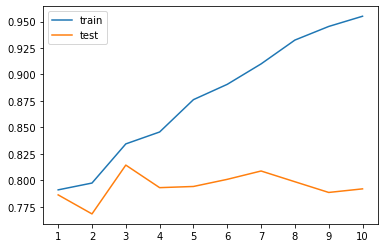

0.8143896833503576


In [85]:
tr = []
te = []
#画学习曲线
for i in range(10):
    clf = DecisionTreeClassifier(random_state=30,max_depth=1+i)
    clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,x,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
    
x_1 = range(1,11)
plt.plot(x_1,tr,label='train')
plt.plot(x_1,te,label='test')
plt.xticks(range(1,11))
plt.legend()
plt.show()
print(max(te))

In [102]:
import numpy as np
type(np.linspace(0,0.5,50)

numpy.ndarray

In [104]:
import numpy as np
#gini_threshold = np.linspace(0,0.5,50)  #将0到0.5等分成50个点,gini的取值范围是0,0.5
#entropy_threshold = np.linspace(0,1,50)  #将0到1等分成50个点
parameters = {
    "criterion":("gini","entropy"),
    "splitter":("best","random"),
    "max_depth":[*range(1,10)],
    "min_samples_leaf":[*range(1,50,5)],
    "min_impurity_decrease":[*np.linspace(0,0.5,50)]  #不纯度
}
clf = DecisionTreeClassifier(random_state=30)
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,Ytrain)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=30),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_impurity_decrease': [0.0, 0.01020408163265306,
                                                   0.02040816326530612,
                                                   0.030612244897959183,
                                                   0.04081632653061224,
                                                   0.0510204081632653,
                                                   0.061224489795918366,
                                                   0.07142857142857142,
                                                   0.08163265306122448,
                                                   0.09183673469387...
                                                   0.16326530612244897,
                                                   0.17346938775510204,
      

In [ ]:
GS.best_params_  #从我们输入的参数和参数列表中选出最佳的组合

In [ ]:
GS.best_score_   #网络搜索后的模型的判断标准

## 回归树

核心思想:构建完成回归树后，实现了对整个(特征和对应标签值所在)空间的划分,实际预测时，新样本会按照决策树的决策过程，被划分到某一个区域$R_i$，而这个新样本的预测值就是它所在的区域（的训练样本的标签值的均值），也就意味着该方法所得的回归，其实取值是有限的，等于决策树形成的区域数。

我们用一个经典的棒球案例来解释回归树：根据从业年限和表现，去预估棒球运动员的工资。如下所示，有1987个数据样本，包含322个棒球运动员。红黄表示高收入，蓝绿表示低收入。横坐标是年限，纵坐标是表现。

回归树背后的含义：对空间的划分。整个平面被划分成3部分：

$R1={X∣Years<4.5}$

$R2={X∣Years≥4.5,Hits<117.5}$

$R3={X∣Years≥4.5,Hits≥117.5}$

每个区域$Ri$的工资就等于该区域所有训练样本的工资平均值。这里的预测工资总共就3种取值，分别为5.11、6.00、6.74。

如果新的样本运动员，根据从业年限和表现，落在区域$Ri$中，那么预估他的工资就是对应区域的工资，即上述3个值中的某一个。

### 回归树案例：用回归树拟合正弦曲线

In [22]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

#### 创建一条含有噪声的正弦曲线

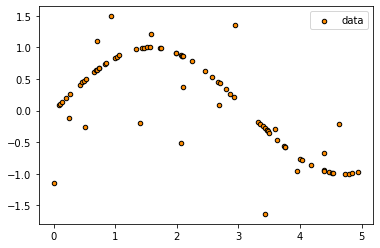

In [23]:
rng = np.random.RandomState(1)
X= np.sort(5*rng.rand(80,1),axis=0)
y = np.sin(x).ravel()
y[::5] += 3*(0.5-rng.rand(16))
plt.scatter(X,y,s=20,edgecolors='black',c='darkorange',label='data')
plt.legend()
plt.show()

In [24]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X,y)
regr_2.fit(X,y)

DecisionTreeRegressor(max_depth=5)

In [26]:
X_test = np.arange(0.0,5.0,0.01)[:,np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

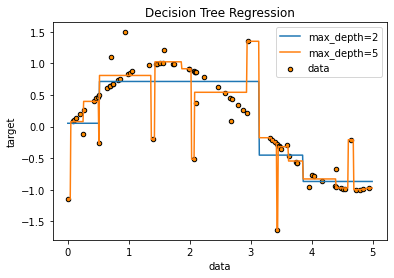

In [31]:
plt.scatter(X,y,s=20,edgecolors='black',c='darkorange',label='data')
plt.plot(X_test,y_1,label='max_depth=2')
plt.plot(X_test,y_2,label='max_depth=5')
plt.xlabel('data')
plt.ylabel('target')
plt.title('Decision Tree Regression')
plt.legend()
plt.show()

### 回归树案例：以波士顿房价来做代码演示

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [4]:
boston = load_boston()

In [ ]:
regressor = DecisionTreeRegressor(random_state=0) #实例化
cross_val_scorea（regressoreg,boston.data,boston.target,cv=10)

# 集成方法

集成方法 的目标是把多个使用给定学习算法构建的基估计器的预测结果结合起来，从而获得比单个估计器更好的泛化能力/鲁棒性。

##  随机森林

scikit-learn 的实现是取每个分类器预测概率的平均，而不是让每个分类器对类别进行投票。

通俗的讲就是，假设随机森林由5颗树构成，每颗树预测为分类1的概率为${P_1,P_2,P_3,P_4,P_5}$,那最终预测结果为分类1的概率为5个概率的均值。而不是对5棵树预测的分类结果，取投票最多的分类。

# 降维

## 案例：高纬数据可视化

In [32]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [33]:
iris = load_iris()
y = iris.target
X = iris.data

In [38]:
X.shape

(150, 4)

In [35]:
y.shape

(150,)

In [37]:
#调用PCA
pca = PCA(n_components=2)
pca.fit(X)
X_dr = pca.transform(X) #获取新矩阵
X_dr.shape

(150, 2)

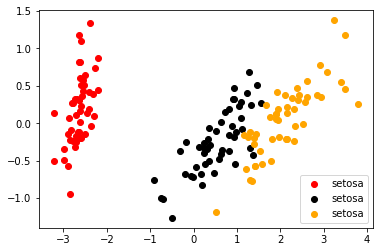

In [49]:
colors = ['red','black','orange']
for i in [0,1,2]:
    plt.scatter(X_dr[y == i,0],X_dr[y==i,1],c=colors[i],label=iris.target_names[0])
plt.legend()
plt.show()

In [50]:
#属性explained_variance,查勘降维后每个新特征向量上所带的信息量大小（可解释信方差的大小）
pca.explained_variance_

array([4.22824171, 0.24267075])

In [51]:
#explained_variance_ratio_,查勘降维后每个新特征向量所占的信息量占原始数据总信息量的百分比
#又叫做可解释方差贡献率
pca.explained_variance_ratio_  


array([0.92461872, 0.05306648])